## MLR on Insurance

### import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds = pd.read_csv("insurance.csv")

In [4]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1334 non-null   int64  
 1   sex       1334 non-null   object 
 2   bmi       1325 non-null   float64
 3   children  1334 non-null   int64  
 4   smoker    1334 non-null   object 
 5   region    1334 non-null   object 
 6   charges   1334 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.1+ KB


In [6]:
ds.describe()

,age,bmi,children,charges
count,1334.000000,1325.000000,1334.000000,1334.000000
mean,39.186657,30.642668,1.095202,13283.517023
std,14.038061,6.107192,1.205423,12123.263508
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4740.287150
50%,39.000000,30.305000,1.000000,9369.615750
75%,51.000000,34.600000,2.000000,16746.657400
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
ds.isnull().sum()

age         0
sex         0
bmi         9
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

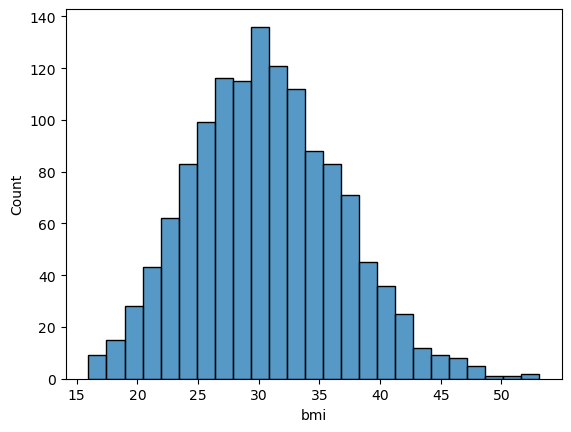

In [8]:
sns.histplot(ds['bmi'])

In [9]:
bmi_mean= ds.bmi.mean()
print(bmi_mean)

30.64266792452829


In [10]:
ds.bmi.fillna(bmi_mean, inplace=True)

In [11]:
ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
ds.smoker.value_counts()

no     1060
yes     274
Name: smoker, dtype: int64

In [14]:
ds.region.value_counts()

southeast    364
northwest    325
northeast    323
southwest    322
Name: region, dtype: int64

### Splitting the data into independent (x) and depenedent (y) variables

In [15]:
ds.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
x=ds[['age','sex','bmi', 'children', 'smoker', 'region']]

In [17]:
y=ds[['charges']]

### Handling categorical variables

In [18]:
x_new=pd.get_dummies(ds[['age','sex','bmi', 'children', 'smoker', 'region']]).astype(int)

In [19]:
x_new.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


### Splitting the Data set into the Training and Test set

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=.20,random_state=0)

### Training the Multiple Linear Regression model on the Training set

In [21]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
#.fit to train your model
regressor.fit(x_train.values,y_train)

LinearRegression()

### Intercept and Coefficient

In [22]:
print(f"Coefficient: {regressor.coef_}")

Coefficient: [[   249.5717434     324.08690763    571.16159386    -83.10929623
      83.10929623 -11706.00778774  11706.00778774    609.53052505
     120.95616742   -382.29605906   -348.1906334 ]]


In [23]:
print(f"Intercept: {regressor.intercept_}")

Intercept: [-78.5319673]


### Predicting the Test set results

In [24]:
y_pred=regressor.predict(x_test.values)

### Calculate RMSE, R-Square

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [26]:
print(F"MSE: {mean_squared_error(y_test,y_pred):.2f}")

MSE: 36397850.91


In [27]:
print(F"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred)):.2f}")

RMSE: 6033.06


In [29]:
print(f"R-square: {r2_score(y_test,y_pred):.2f}")

R-square: 0.80


## Validation case scenario:

In [30]:
x_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1016,51,37,0,0,1,1,0,0,0,0,1
445,45,33,0,1,0,1,0,0,0,0,1
458,56,39,0,0,1,1,0,0,0,0,1
251,63,32,2,1,0,0,1,0,0,0,1
980,20,30,5,0,1,1,0,1,0,0,0


### case1 
how much age 53, bmi 36.6, 3 children, male, nonsmoker, from southwest need to pay?

In [31]:
regressor.predict([[53,36,3,0,1,1,0,0,0,0,1]])

array([[14558.29476443]])

### case 2
how much age 50, bmi 27,1 children, female, nonsmoker, from northeast need to pay?

In [32]:
regressor.predict([[50,27,1,1,0,1,0,1,0,0,0]])

array([[10541.9767438]])